# imoprt modules

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load Data 

In [78]:
df=pd.read_csv("car_price_prediction.csv")
print("shape :",df.shape)

shape : (19235, 18)


# Explore Data

In [300]:
df.isnull().sum()

Manufacturer            0
Price                   0
Levy                    0
Unnamed: 3          19235
Model                   0
Prod. year              0
Category                0
Leather interior        0
Fuel type               0
Engine volume           0
Mileage                 0
Cylinders               0
Gear box type           0
Drive wheels            0
Doors                   0
Wheel                   0
Color                   0
Airbags                 0
dtype: int64

*we must drop Unnamed: 3*

In [79]:
df.drop('Unnamed: 3',axis='columns',inplace=True)


In [4]:
df.describe()

,Price,Prod. year,Cylinders,Airbags
count,1.923500e+04,19235.000000,19235.000000,19235.000000
mean,1.855606e+04,2010.913335,4.583052,6.583156
std,1.905912e+05,5.668737,1.199981,4.320079
min,1.000000e+00,1939.000000,1.000000,0.000000
25%,5.331000e+03,2009.000000,4.000000,4.000000
50%,1.317200e+04,2012.000000,4.000000,6.000000
75%,2.206900e+04,2015.000000,4.000000,12.000000
max,2.630750e+07,2020.000000,16.000000,16.000000


###  Price not make sense , max:26 million!!!  min :1!!!

In [80]:
df.Price.sort_values(ascending=False).head(10)

13925    26307500
9261       872946
10613      627220
14009      308906
9307       297930
11480      297930
695        288521
9861       260296
11100      254024
12129      250574
Name: Price, dtype: int64

In [81]:
df.drop(index=13925,inplace=True)

## Is there a car for less than 5000 !! , I think it was a data entry error

In [82]:
error=df[df["Price"]<5000].index.to_list()
df.drop(index=error,inplace=True)

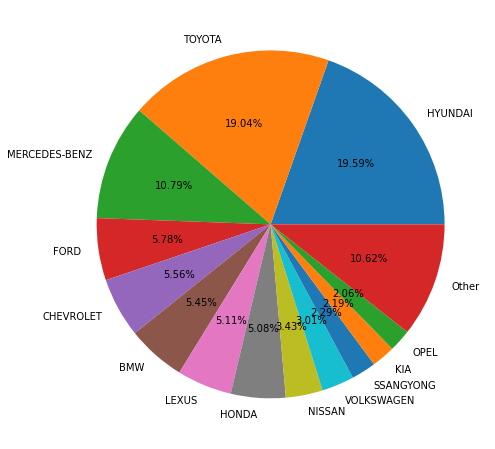

In [5]:
plt.figure(figsize=(10,8))

maxManufacturer = df.Manufacturer.value_counts()[:13].to_list()
maxManufacturernames = df.Manufacturer.value_counts().index[:13].to_list()
maxManufacturernames.append("Other")
allManufacturer = sum(maxManufacturer)

others = sum(list(df.Manufacturer.value_counts())) - allManufacturer
maxManufacturer.append(others)
plt.pie(maxManufacturer, labels=maxManufacturernames, autopct="%0.2f%%")
plt.show()

# Date Preprocessing

### 1-Manufacturer

In [83]:
gb=df.groupby(by="Manufacturer")["Price"].mean().sort_values(ascending=False).head(60)
gb


Manufacturer
LAMBORGHINI      872946.000000
BENTLEY          197574.500000
FERRARI           66955.500000
PORSCHE           57614.113636
LAND ROVER        55081.604167
ASTON MARTIN      54000.000000
TESLA             53941.000000
JAGUAR            47762.000000
HUMMER            39005.000000
LEXUS             34141.940741
SSANGYONG         31016.097950
JEEP              29039.066667
MASERATI          26761.333333
MERCEDES-BENZ     25939.053571
BMW               25652.536266
HYUNDAI           24781.230290
AUDI              23939.104895
INFINITI          21780.518519
CADILLAC          21678.250000
MINI              20835.435897
FORD              20780.199507
ACURA             20436.666667
LINCOLN           20008.400000
TOYOTA            19682.226269
PEUGEOT           19261.090909
HONDA             18537.713514
CHEVROLET         18336.067138
KIA               17694.109244
BUICK             16530.500000
MERCURY           16412.333333
SCION             16173.000000
GAZ               16128.42

In [84]:
A=gb[gb>=50000].index
B=gb[gb>=30000].index
C=gb[gb>=15000].index
def category(x):
    if x in A:
        return "A"
    elif x in B:
        return "B"
    elif x in C:
        return "C"
    else:
        return "D"
df["Manufacturer"]=df["Manufacturer"].apply(category)

### 2-Prod.year

<AxesSubplot:xlabel='Prod. year', ylabel='count'>

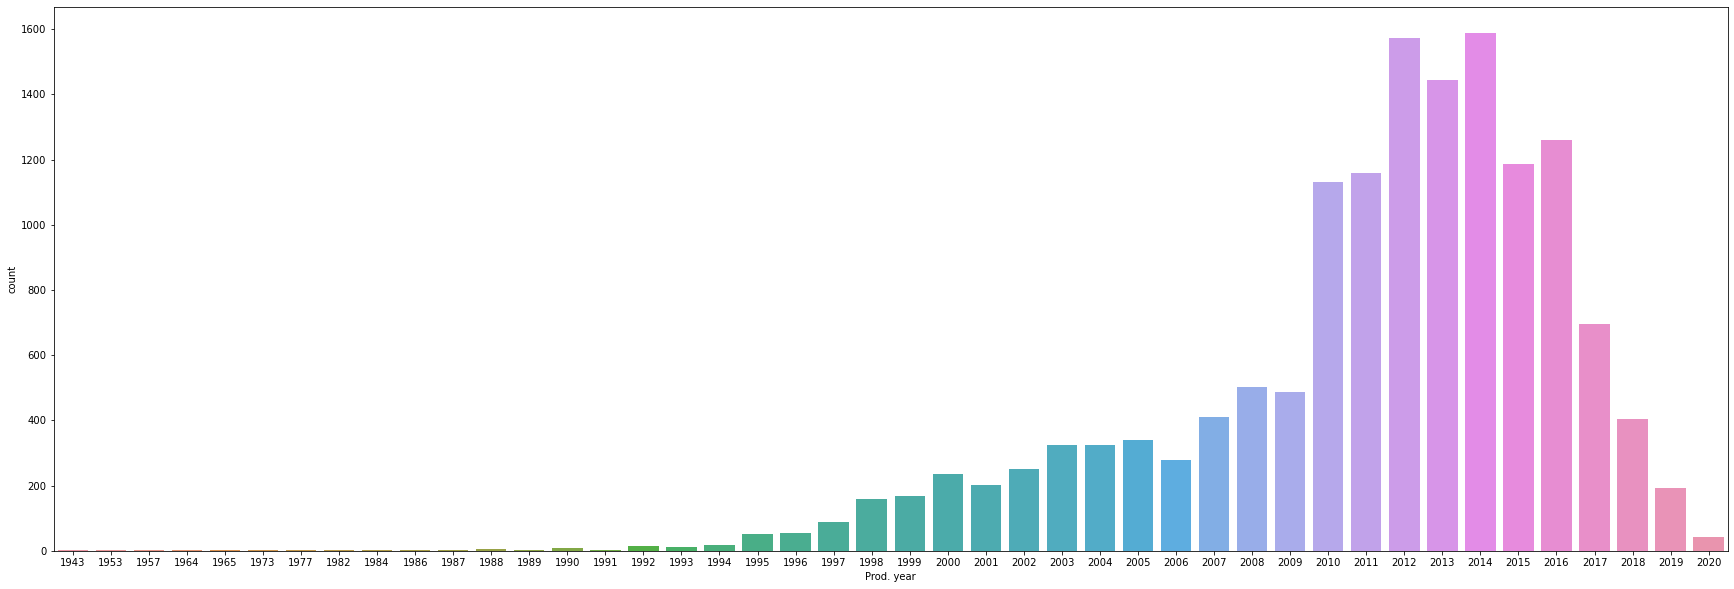

In [85]:
plt.figure(figsize=(30,10))
sns.countplot(x="Prod. year",data=df)


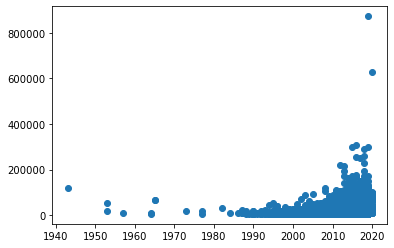

In [86]:
plt.scatter(df["Prod. year"],df["Price"])

### 3-Doors

In [87]:
df["Doors"].value_counts()

4-May    13886
2-Mar      623
>5         112
Name: Doors, dtype: int64

*what!,what mean "4-May" and "2-Mar"?*

In [88]:
df["Doors"]=df["Doors"].replace({
    "4-May":"4-5",
    "2-Mar":"2-3"})

### 4-Levy

In [89]:
df["Levy"].value_counts()


-       4932
765      444
891      424
639      361
640      319
        ... 
1502       1
2223       1
3008       1
2236       1
1064       1
Name: Levy, Length: 508, dtype: int64

In [90]:
df["Levy"]=df["Levy"].replace({
    "-":"0"})
df['Levy'] = df['Levy'].apply(lambda x : int(x))

### 5-mile Age

In [91]:
df["Mileage"].head()

2      70562 0
5     124978 0
7      81600 0
16    152200 0
17     85000 0
Name: Mileage, dtype: object

In [92]:
df.Mileage = df.Mileage.apply(lambda x : str(x).replace(" 0",""))
df['Mileage'] = df['Mileage'].apply(lambda x : float(x))

### 6-Engine volume

In [44]:
df['Engine volume'].unique()

array(['3.5', '3.7', '2.2', '1.4 Turbo', '4.3', '2', '3.0 Turbo', '3.2',
       '3', '1.8 Turbo', '4.2', '2.0 Turbo', '1.9', '2.8', '4.2 Turbo',
       '3.6', '2.4', '4', '2.7', '1.4', '2.7 Turbo', '5.2', '4.0 Turbo',
       '6.8', '4.4', '2.5', '1.8', '4.8', '4.4 Turbo', '3.5 Turbo',
       '4.8 Turbo', '1.6', '5', '2.3', '2.5 Turbo', '0.7', '3.1',
       '2.8 Turbo', '4.5', '0.4 Turbo', '5.0 Turbo', '1.9 Turbo', '4.6',
       '6.2', '3.6 Turbo', '5.3', '1', '1.5', '1.5 Turbo', '1.2', '1.3',
       '1.7', '0.8', '5.7', '3.3', '1.6 Turbo', '0.7 Turbo', '4.7', '6.4',
       '5.9', '6.3', '1.3 Turbo', '2.3 Turbo', '2.4 Turbo', '2.2 Turbo',
       '3.7 Turbo', '3.8', '2.9 Turbo', '1.0 Turbo', '4.7 Turbo',
       '3.2 Turbo', '1.7 Turbo', '6', '20', '0', '5.6', '2.1', '2.9',
       '1.1', '5.7 Turbo', '5.4', '4.6 Turbo', '5.4 Turbo', '0.3 Turbo',
       '5.5', '2.6', '6.3 Turbo', '5.5 Turbo', '2.1 Turbo', '0.6 Turbo',
       '7.3', '4.5 Turbo', '0.8 Turbo', '5.8', '0.2 Turbo', '1.2 Turbo',

In [93]:
df['Engine volume'] = df['Engine volume'].apply(lambda x : str(x).replace(" Turbo",""))
df['Engine volume'] = df['Engine volume'].apply(lambda x : float(x))

### 7-Leather interior

In [94]:
df['Leather interior'].value_counts()


Yes    10060
No      4561
Name: Leather interior, dtype: int64

<AxesSubplot:xlabel='Leather interior', ylabel='count'>

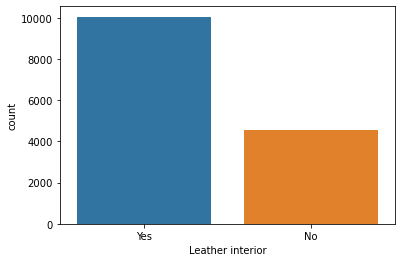

In [95]:
sns.countplot(x='Leather interior',data=df)

### 8-Colors

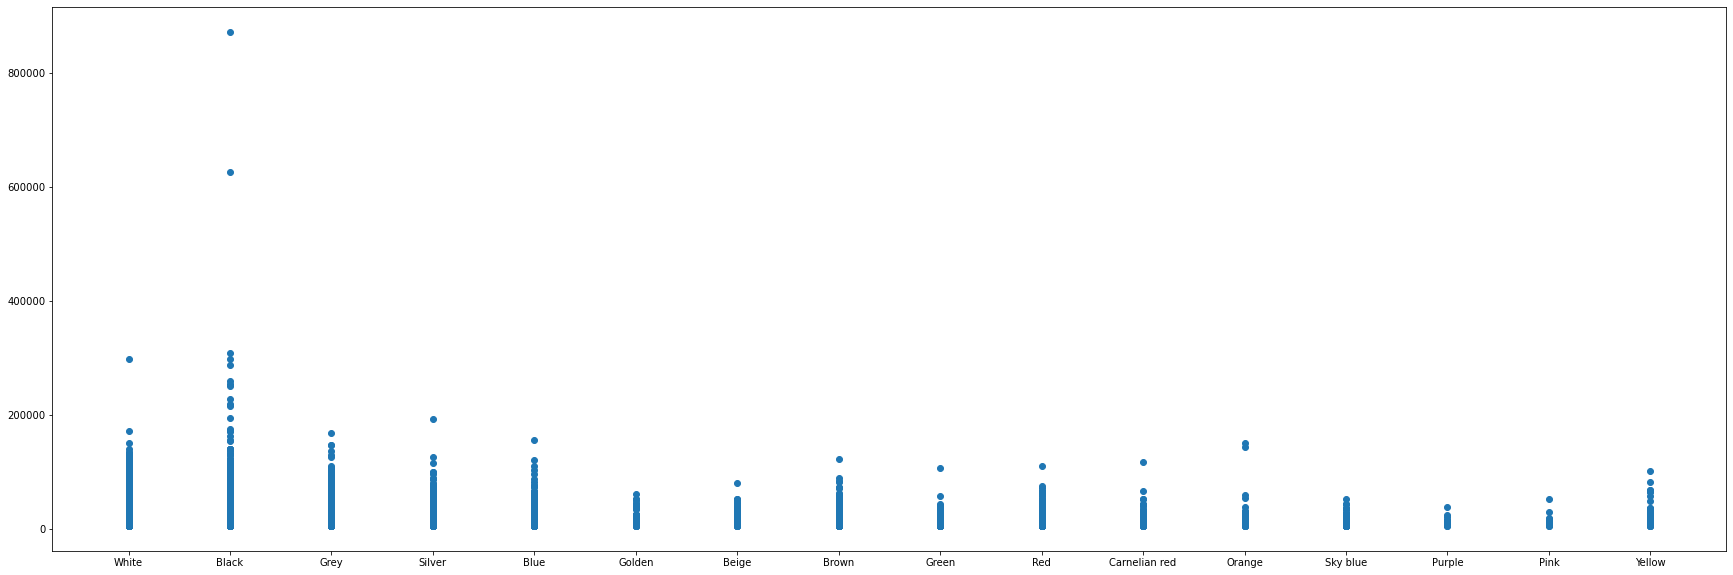

In [96]:
plt.figure(figsize=(30,10))

plt.scatter(df["Color"],df["Price"])

# i think the color not effect in Price

In [97]:
df.drop("Color",axis=1,inplace=True)

### 10-Model


<AxesSubplot:xlabel='Model', ylabel='count'>

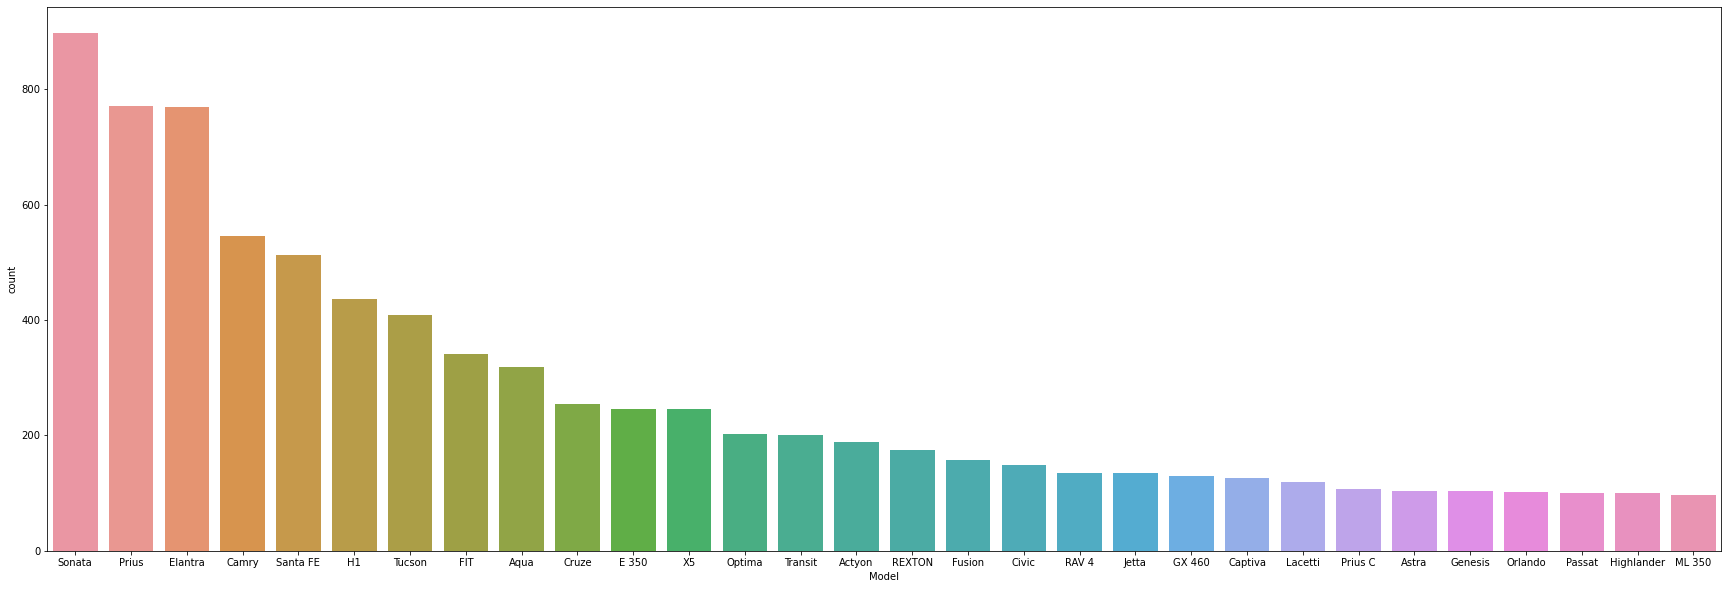

In [98]:
plt.figure(figsize=(30,10))

sns.countplot(x ='Model',data = df,order=df.Model.value_counts().iloc[:30].index )

In [99]:
len(df['Model'].unique())

1455

In [100]:
gb2=df.groupby("Model")["Price"].mean().sort_values(ascending=False).head(60)
gb2

Model
Urus                        872946.000000
G 65 AMG 63AMG              627220.000000
AMG GT S                    297930.000000
Range Rover Vogue           297930.000000
M5 Машина в максимально     288521.000000
GLE 400 A M G               254024.000000
Continental GT              219527.000000
G 65 AMG G63 AMG            216391.000000
GLE 400                     193287.000000
GLE 400 Coupe, AMG Kit      193184.000000
Mulsanne                    175622.000000
M6 Gran cupe                163077.000000
Range Rover Velar           150533.000000
F-type R                    150533.000000
GLS 450                     148964.500000
M4 Competition              144261.000000
GLE 43 AMG                  141124.000000
GLC 250                     141124.000000
GLC 300 GLC coupe           131716.000000
G 350                       124660.000000
911                         119516.800000
230 W153                    119172.000000
RX 350 F sport              119172.000000
S 350 W2222                 

In [101]:
 A=gb2[gb2>=200000].index
B=gb2[gb2>=100000].index
C=gb2[gb2>=50000].index
def category2(x):
    if x in A:
        return "A"
    elif x in B:
        return "B"
    elif x in C:
        return "C"
    else:
        return "D"
df["Model"]=df["Model"].apply(category2)

### 10-other

In [55]:
df["Drive wheels"].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

In [56]:
df["Wheel"].unique()

array(['Left wheel', 'Right-hand drive'], dtype=object)

In [57]:
df["Fuel type"].unique()

array(['Petrol', 'Hybrid', 'Diesel', 'CNG', 'LPG', 'Plug-in Hybrid',
       'Hydrogen'], dtype=object)

In [58]:
df["Fuel type"].unique()

array(['Petrol', 'Hybrid', 'Diesel', 'CNG', 'LPG', 'Plug-in Hybrid',
       'Hydrogen'], dtype=object)

In [59]:
df["Gear box type"].unique()

array(['Automatic', 'Manual', 'Tiptronic', 'Variator'], dtype=object)

In [102]:
df2=df.copy()

In [103]:
df2=pd.get_dummies(df2)

# Scale

In [112]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df2[['Mileage']])
df2['Mileage'] = scaler.transform(df2[['Mileage']])
scaler.fit(df2[['Prod. year']])
df2['Prod. year'] = scaler.transform(df2[['Prod. year']])
scaler.fit(df2[['Levy']])
df2['Levy'] = scaler.transform(df2[['Levy']])

In [113]:
X=df2.drop("Price",axis=1)
y=df2["Price"]


# Linear regression

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
score=cross_val_score(LinearRegression(), X, y,cv=10) 
np.average(score)

0.40702926165366227

# SVR

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
SV = SVR(kernel="linear")
SV.fit(X_train, y_train)
SV.score(X_train, y_train)

0.11687833824756177

# DecisionTreeRegressor

In [124]:
from sklearn.tree import DecisionTreeRegressor
Regressor=DecisionTreeRegressor()
Regressor.fit(X_train,y_train)
Regressor.score(X_train,y_train)
Regressor.score(X_test,y_test)

0.3722933963612285

# XG Boost

In [126]:
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(X_train,y_train)
print("Training score:",GB.score(X_train,y_train))
print("Testing score:",GB.score(X_test,y_test))

Training score: 0.7556822136989048
Testing score: 0.6215741837606426
